In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [2]:
for i in range(1):
    if i==0:
        train = pd.read_pickle('salida/nuevo8/RTEGLUE/TRAIN_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo8/RTEGLUE/TRAIN_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            print(i+1)

In [3]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,1.960,0.000,0.000000,0.000000,0.000000,7,0.000000,0,7,0,9,1.000000,0,,0,,1.000000,not_entailment
1,0.000000,0.000000,2.448,0.000,0.000000,0.000000,0.000000,9,0.000000,0,9,0,28,0.555556,0,,0,,0.333333,entailment
2,0.000000,0.000000,2.318,0.000,0.000000,0.000000,0.000000,5,0.000000,0,5,0,25,1.000000,0,,0,,0.000000,entailment
3,1.335329,1.000037,2.119,1.564,3.827985,0.004184,0.265281,7,0.028571,0,8,1,35,0.750000,0,,0,,0.500000,entailment
4,4.077068,0.880884,1.764,1.635,4.103219,0.003542,0.612034,6,0.016667,0,7,1,60,0.571429,0,,0,,0.500000,not_entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,0.000000,0.000000,2.070,0.000,0.000000,0.000000,0.000000,7,0.000000,0,7,0,18,0.571429,0,,0,,1.000000,not_entailment
2486,0.000000,0.000000,1.827,0.000,0.000000,0.000000,0.000000,5,0.000000,0,5,0,90,1.000000,0,,0,,0.333333,entailment
2487,1.370799,1.127231,2.583,1.960,4.080920,0.004082,0.364700,5,0.038462,0,6,1,26,0.500000,0,,0,,0.333333,not_entailment
2488,0.000000,0.000000,1.975,0.000,0.000000,0.000000,0.000000,7,0.000000,0,8,0,84,1.000000,0,,0,,0.000000,entailment


<Axes: title={'center': 'Jaro-Winkler_rit'}, xlabel='clases'>

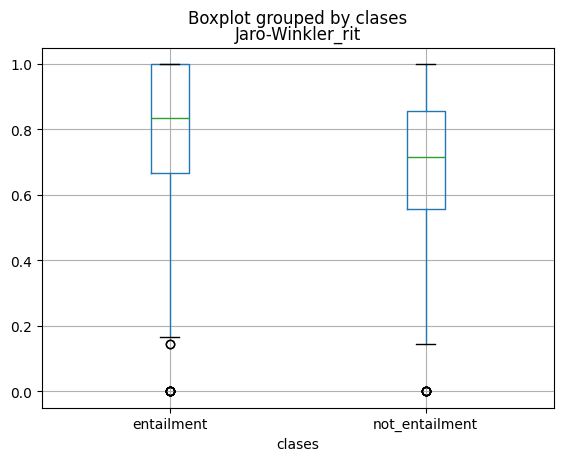

In [4]:
train.boxplot(by="clases",column="Jaro-Winkler_rit")

## Eliminar características

In [5]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
#train=train.drop(["diferencias","list_m","list_M","list_T"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,1.960,0.000,0.000000,0.000000,0.000000,7,0.000000,0,7,0,9,1.000000,0,,0,,1.000000,not_entailment
1,0.000000,0.000000,2.448,0.000,0.000000,0.000000,0.000000,9,0.000000,0,9,0,28,0.555556,0,,0,,0.333333,entailment
2,0.000000,0.000000,2.318,0.000,0.000000,0.000000,0.000000,5,0.000000,0,5,0,25,1.000000,0,,0,,0.000000,entailment
3,1.335329,1.000037,2.119,1.564,3.827985,0.004184,0.265281,7,0.028571,0,8,1,35,0.750000,0,,0,,0.500000,entailment
4,4.077068,0.880884,1.764,1.635,4.103219,0.003542,0.612034,6,0.016667,0,7,1,60,0.571429,0,,0,,0.500000,not_entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,0.000000,0.000000,2.070,0.000,0.000000,0.000000,0.000000,7,0.000000,0,7,0,18,0.571429,0,,0,,1.000000,not_entailment
2486,0.000000,0.000000,1.827,0.000,0.000000,0.000000,0.000000,5,0.000000,0,5,0,90,1.000000,0,,0,,0.333333,entailment
2487,1.370799,1.127231,2.583,1.960,4.080920,0.004082,0.364700,5,0.038462,0,6,1,26,0.500000,0,,0,,0.333333,not_entailment
2488,0.000000,0.000000,1.975,0.000,0.000000,0.000000,0.000000,7,0.000000,0,8,0,84,1.000000,0,,0,,0.000000,entailment


In [6]:
train[(train["list_m"]!=0) & (train["clases"]=="YES")]

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases


In [7]:
train.columns

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'verbT',
       'negH', 'verbH', 'overlap_ent', 'clases'],
      dtype='object')

In [8]:
train=train.drop(["verbT","verbH"],axis=1)

In [9]:
#train = train[['list_incomp','list_incomp','Jaro-Winkler_rit','list_m','negT', 'negH','clases']]
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.000000,0.000000,1.960,0.000,0.000000,0.000000,0.000000,7,0.000000,0,7,0,9,1.000000,0,0,1.000000,not_entailment
1,0.000000,0.000000,2.448,0.000,0.000000,0.000000,0.000000,9,0.000000,0,9,0,28,0.555556,0,0,0.333333,entailment
2,0.000000,0.000000,2.318,0.000,0.000000,0.000000,0.000000,5,0.000000,0,5,0,25,1.000000,0,0,0.000000,entailment
3,1.335329,1.000037,2.119,1.564,3.827985,0.004184,0.265281,7,0.028571,0,8,1,35,0.750000,0,0,0.500000,entailment
4,4.077068,0.880884,1.764,1.635,4.103219,0.003542,0.612034,6,0.016667,0,7,1,60,0.571429,0,0,0.500000,not_entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,0.000000,0.000000,2.070,0.000,0.000000,0.000000,0.000000,7,0.000000,0,7,0,18,0.571429,0,0,1.000000,not_entailment
2486,0.000000,0.000000,1.827,0.000,0.000000,0.000000,0.000000,5,0.000000,0,5,0,90,1.000000,0,0,0.333333,entailment
2487,1.370799,1.127231,2.583,1.960,4.080920,0.004082,0.364700,5,0.038462,0,6,1,26,0.500000,0,0,0.333333,not_entailment
2488,0.000000,0.000000,1.975,0.000,0.000000,0.000000,0.000000,7,0.000000,0,8,0,84,1.000000,0,0,0.000000,entailment


In [10]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [11]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [12]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
sumas,1.000000,0.346805,0.090661,0.714479,0.661990,0.265214,0.728947,-0.018650,0.170204,0.019937,0.134029,0.346491,0.193385,-0.090540,0.054729,0.053273,-0.120518
distancias,0.346805,1.000000,0.087087,0.654817,0.642735,0.433368,0.513204,0.164682,0.854539,0.086159,0.557298,0.969769,-0.161176,-0.328415,-0.059062,0.074789,-0.269280
entropia_total,0.090661,0.087087,1.000000,0.195076,0.142805,0.067816,0.175394,0.209996,0.111202,0.052073,0.201776,0.051402,-0.251583,0.030277,-0.072784,0.029611,0.075230
entropias,0.714479,0.654817,0.195076,1.000000,0.963148,0.466370,0.912196,0.017075,0.563945,0.055591,0.290811,0.637119,-0.164176,-0.285312,-0.048427,0.066641,-0.232588
mutinf,0.661990,0.642735,0.142805,0.963148,1.000000,0.481759,0.885859,-0.011596,0.542181,0.042559,0.257026,0.612909,-0.158895,-0.281930,-0.044894,0.064121,-0.241892
mearts,0.265214,0.433368,0.067816,0.466370,0.481759,1.000000,0.398066,0.001134,0.373041,0.051383,0.178844,0.401638,-0.134523,-0.198231,-0.050370,0.016729,-0.156389
max_info,0.728947,0.513204,0.175394,0.912196,0.885859,0.398066,1.000000,-0.016308,0.433204,0.025468,0.208241,0.512836,-0.101778,-0.245234,-0.036019,0.061554,-0.190300
list_comp,-0.018650,0.164682,0.209996,0.017075,-0.011596,0.001134,-0.016308,1.000000,0.140684,0.034399,0.895783,0.174676,-0.055600,0.143642,-0.067420,0.066493,0.149334
diferencias,0.170204,0.854539,0.111202,0.563945,0.542181,0.373041,0.433204,0.140684,1.000000,0.069671,0.483517,0.852719,-0.297297,-0.344488,-0.104093,0.056113,-0.218008
list_incomp,0.019937,0.086159,0.052073,0.055591,0.042559,0.051383,0.025468,0.034399,0.069671,1.000000,0.119053,0.076405,-0.012100,-0.008613,-0.015735,0.010468,-0.030534


<Axes: >

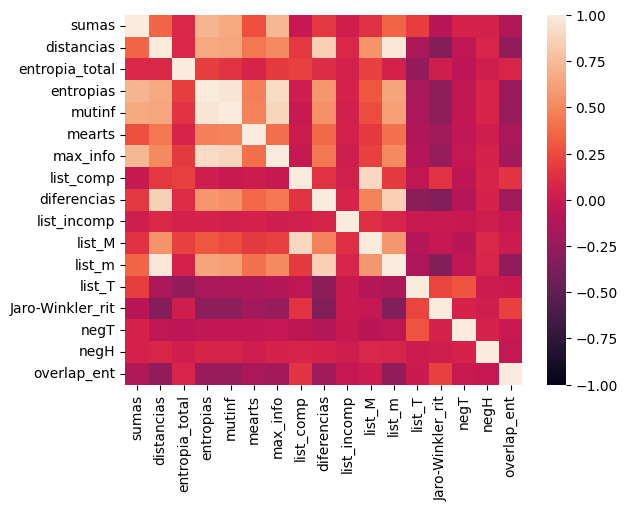

In [13]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [14]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
sumas,1.000000,0.346805,0.090661,0.714479,0.661990,0.265214,0.728947,-0.018650,0.170204,0.019937,0.134029,0.346491,0.193385,-0.090540,0.054729,0.053273,-0.120518
distancias,0.346805,1.000000,0.087087,0.654817,0.642735,0.433368,0.513204,0.164682,0.854539,0.086159,0.557298,0.969769,-0.161176,-0.328415,-0.059062,0.074789,-0.269280
entropia_total,0.090661,0.087087,1.000000,0.195076,0.142805,0.067816,0.175394,0.209996,0.111202,0.052073,0.201776,0.051402,-0.251583,0.030277,-0.072784,0.029611,0.075230
entropias,0.714479,0.654817,0.195076,1.000000,0.963148,0.466370,0.912196,0.017075,0.563945,0.055591,0.290811,0.637119,-0.164176,-0.285312,-0.048427,0.066641,-0.232588
mutinf,0.661990,0.642735,0.142805,0.963148,1.000000,0.481759,0.885859,-0.011596,0.542181,0.042559,0.257026,0.612909,-0.158895,-0.281930,-0.044894,0.064121,-0.241892
mearts,0.265214,0.433368,0.067816,0.466370,0.481759,1.000000,0.398066,0.001134,0.373041,0.051383,0.178844,0.401638,-0.134523,-0.198231,-0.050370,0.016729,-0.156389
max_info,0.728947,0.513204,0.175394,0.912196,0.885859,0.398066,1.000000,-0.016308,0.433204,0.025468,0.208241,0.512836,-0.101778,-0.245234,-0.036019,0.061554,-0.190300
list_comp,-0.018650,0.164682,0.209996,0.017075,-0.011596,0.001134,-0.016308,1.000000,0.140684,0.034399,0.895783,0.174676,-0.055600,0.143642,-0.067420,0.066493,0.149334
diferencias,0.170204,0.854539,0.111202,0.563945,0.542181,0.373041,0.433204,0.140684,1.000000,0.069671,0.483517,0.852719,-0.297297,-0.344488,-0.104093,0.056113,-0.218008
list_incomp,0.019937,0.086159,0.052073,0.055591,0.042559,0.051383,0.025468,0.034399,0.069671,1.000000,0.119053,0.076405,-0.012100,-0.008613,-0.015735,0.010468,-0.030534


In [15]:
# Checar variables colineales
#sns.relplot(data=train_m, x="sumas", y="Jaro-Winkler_rit")

In [16]:
# RTE3
y_train=[]
for i in y_:
    if i == "entailment":
        y_train.append(1)
    else:
        y_train.append(0)

In [17]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

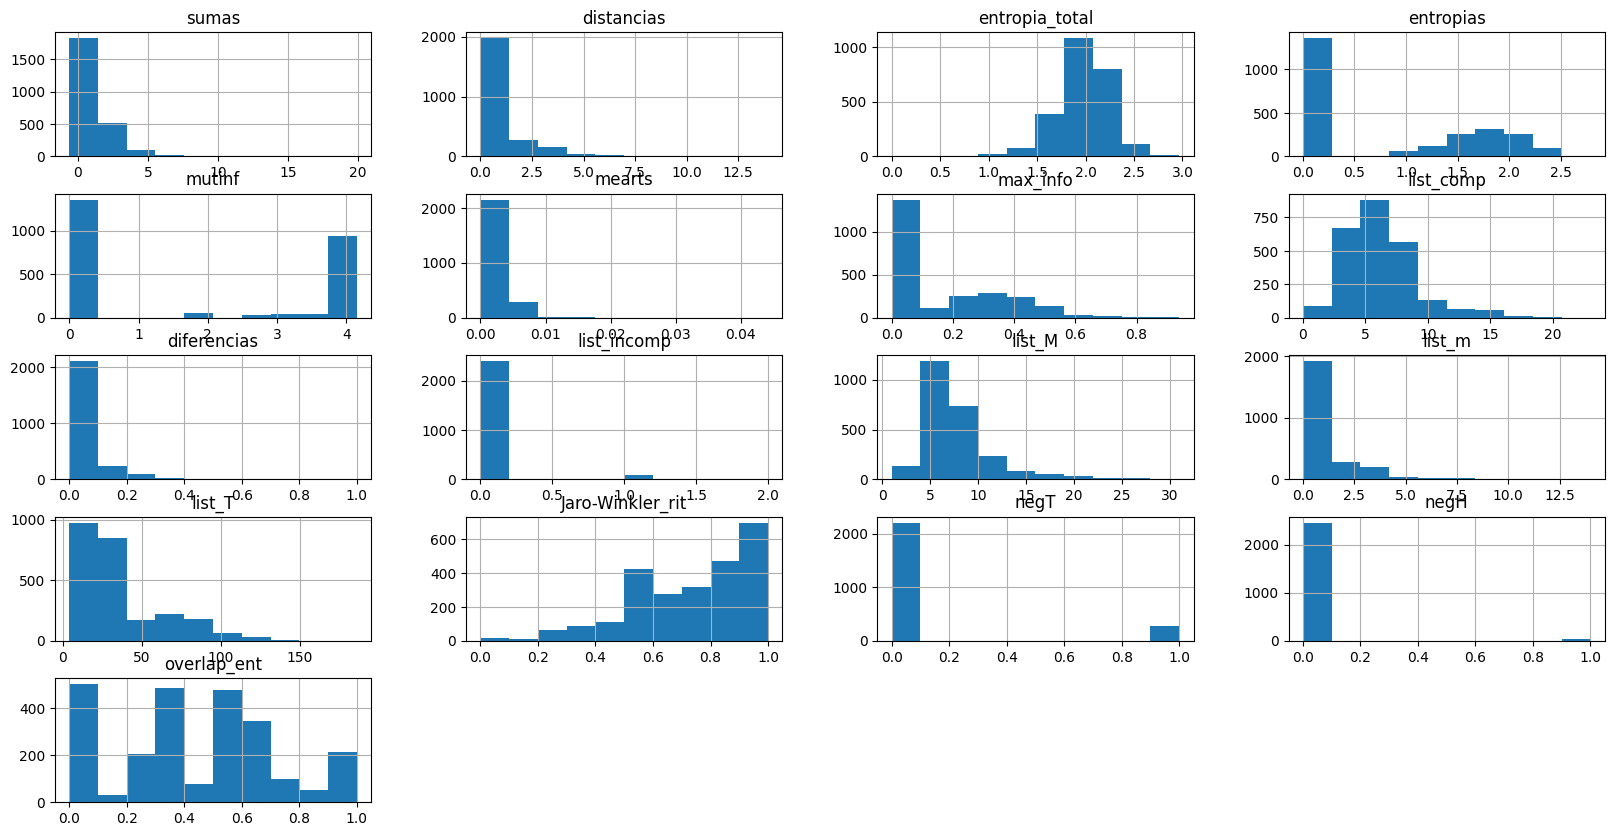

In [18]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [19]:
for i in range(1):
    if i==0:
        test = pd.read_pickle('salida/nuevo8/RTEGLUE/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo8/RTEGLUE/DEV_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            print(i+1)

In [20]:
test = test.reset_index(drop=True)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,1.039306,0.999996,2.206,1.784,3.896886,0.005635,0.336862,3,0.052632,0,4,1,19,1.000000,0,,0,,0.333333,not_entailment
1,0.000000,0.000000,2.194,0.000,0.000000,0.000000,0.000000,4,0.000000,1,5,0,26,1.000000,0,,0,,0.333333,entailment
2,0.000000,0.000000,1.926,0.000,0.000000,0.000000,0.000000,9,0.000000,0,9,0,98,1.000000,0,,0,,0.500000,not_entailment
3,6.202114,2.000003,2.081,1.895,4.017421,0.003175,0.283224,6,0.024390,0,8,2,82,0.750000,0,,0,,0.500000,not_entailment
4,0.000000,0.000000,2.023,0.000,0.000000,0.000000,0.000000,10,0.000000,0,10,0,20,0.800000,0,,0,,0.750000,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,1.176446,2.210574,2.172,2.059,4.005384,0.004329,0.387984,6,0.153846,0,8,2,13,1.000000,0,,0,,0.666667,entailment
273,0.000000,0.000000,1.718,0.000,0.000000,0.000000,0.000000,5,0.000000,1,6,0,35,0.666667,0,,0,,0.333333,entailment
274,7.115469,1.000049,1.994,2.370,4.054100,0.003445,0.475981,6,0.022727,0,7,1,44,0.857143,0,,0,,0.800000,entailment
275,0.000000,0.000000,2.033,0.000,0.000000,0.000000,0.000000,9,0.000000,0,9,0,17,0.555556,0,,0,,0.800000,entailment


In [21]:
#test=test.drop(["diferencias","list_m","list_M","list_T"],axis=1)
#test = test[['list_incomp','list_incomp','Jaro-Winkler_rit','list_m','negT', 'negH','clases']]



In [22]:
test=test.drop(["verbT","verbH"],axis=1)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,1.039306,0.999996,2.206,1.784,3.896886,0.005635,0.336862,3,0.052632,0,4,1,19,1.000000,0,0,0.333333,not_entailment
1,0.000000,0.000000,2.194,0.000,0.000000,0.000000,0.000000,4,0.000000,1,5,0,26,1.000000,0,0,0.333333,entailment
2,0.000000,0.000000,1.926,0.000,0.000000,0.000000,0.000000,9,0.000000,0,9,0,98,1.000000,0,0,0.500000,not_entailment
3,6.202114,2.000003,2.081,1.895,4.017421,0.003175,0.283224,6,0.024390,0,8,2,82,0.750000,0,0,0.500000,not_entailment
4,0.000000,0.000000,2.023,0.000,0.000000,0.000000,0.000000,10,0.000000,0,10,0,20,0.800000,0,0,0.750000,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,1.176446,2.210574,2.172,2.059,4.005384,0.004329,0.387984,6,0.153846,0,8,2,13,1.000000,0,0,0.666667,entailment
273,0.000000,0.000000,1.718,0.000,0.000000,0.000000,0.000000,5,0.000000,1,6,0,35,0.666667,0,0,0.333333,entailment
274,7.115469,1.000049,1.994,2.370,4.054100,0.003445,0.475981,6,0.022727,0,7,1,44,0.857143,0,0,0.800000,entailment
275,0.000000,0.000000,2.033,0.000,0.000000,0.000000,0.000000,9,0.000000,0,9,0,17,0.555556,0,0,0.800000,entailment


In [23]:
test[(test["list_m"]==0) & (test["clases"]=="NO")].shape

(0, 18)

In [24]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [25]:
# RTE3
y_test=[]
for i in y_t:
    if i == "entailment":
        y_test.append(1)
    else:
        y_test.append(0)

In [26]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [27]:
X_train = np.where(np.isnan(X_train), 0, X_train)
X_train

array([[0.        , 0.        , 0.66059993, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.82507583, ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 0.        , 0.78126053, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.06887013, 0.08080417, 0.87057634, ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 0.        , 0.66565554, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.66936299, ..., 1.        , 0.        ,
        0.        ]])

In [28]:
X_train.shape

(2490, 17)

In [29]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [30]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [31]:
model.decision_function(X_train)

array([ 1.03640707,  0.45089369,  0.58257601, ..., -0.10229907,
        0.38051623,  0.12988021])

In [32]:
labels=train.columns[:-1]
labels

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'overlap_ent'],
      dtype='object')

In [33]:
model.classes_

array([0, 1])

In [34]:
model.coef_[0]

array([ 0.33924247, -1.91953056,  0.75372976,  0.71016749, -0.6188123 ,
       -0.56933889,  0.57076439,  1.44337322, -1.28839324, -0.57775502,
       -0.89352359, -3.51855631, -0.48538294,  0.98473403, -0.24860332,
       -0.40791315,  0.43515914])

In [35]:
coeficientes=model.coef_[0]

In [36]:
coeficientes

array([ 0.33924247, -1.91953056,  0.75372976,  0.71016749, -0.6188123 ,
       -0.56933889,  0.57076439,  1.44337322, -1.28839324, -0.57775502,
       -0.89352359, -3.51855631, -0.48538294,  0.98473403, -0.24860332,
       -0.40791315,  0.43515914])

In [37]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  7 list_comp 11 list_m


In [38]:
n_columns=train.shape[1]-1

In [39]:
n_columns

17

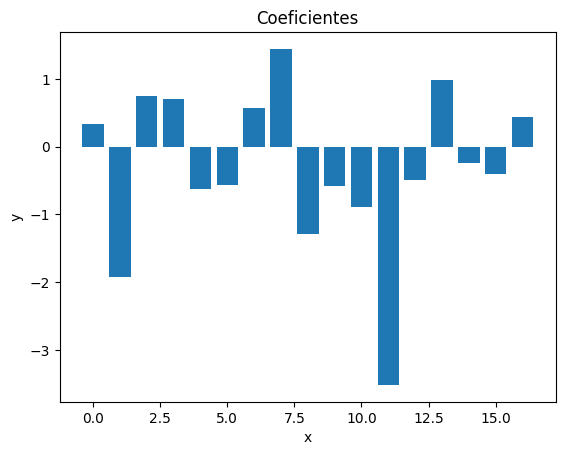

In [40]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [41]:
# X_test = np.where(np.isnan(X_test), 0, X_test)
# X_test

array([[0.0734527 , 0.13885035, 0.83434191, ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 0.        , 0.82980333, ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 0.        , 0.72844175, ..., 0.        , 0.        ,
        0.5       ],
       ...,
       [0.50288387, 0.13885773, 0.75416036, ..., 0.        , 0.        ,
        0.8       ],
       [0.        , 0.        , 0.76891074, ..., 0.        , 0.        ,
        0.8       ],
       [0.        , 0.        , 0.75945537, ..., 1.        , 0.        ,
        0.66666667]])

In [43]:
X_test.shape

(277, 17)

In [44]:
predictions = model.predict(X_test)

In [45]:
predictions

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1])

In [46]:
test["predicciones"]=predictions
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predicciones
0,1.039306,0.999996,2.206,1.784,3.896886,0.005635,0.336862,3,0.052632,0,4,1,19,1.000000,0,0,0.333333,not_entailment,0
1,0.000000,0.000000,2.194,0.000,0.000000,0.000000,0.000000,4,0.000000,1,5,0,26,1.000000,0,0,0.333333,entailment,1
2,0.000000,0.000000,1.926,0.000,0.000000,0.000000,0.000000,9,0.000000,0,9,0,98,1.000000,0,0,0.500000,not_entailment,1
3,6.202114,2.000003,2.081,1.895,4.017421,0.003175,0.283224,6,0.024390,0,8,2,82,0.750000,0,0,0.500000,not_entailment,0
4,0.000000,0.000000,2.023,0.000,0.000000,0.000000,0.000000,10,0.000000,0,10,0,20,0.800000,0,0,0.750000,entailment,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,1.176446,2.210574,2.172,2.059,4.005384,0.004329,0.387984,6,0.153846,0,8,2,13,1.000000,0,0,0.666667,entailment,0
273,0.000000,0.000000,1.718,0.000,0.000000,0.000000,0.000000,5,0.000000,1,6,0,35,0.666667,0,0,0.333333,entailment,0
274,7.115469,1.000049,1.994,2.370,4.054100,0.003445,0.475981,6,0.022727,0,7,1,44,0.857143,0,0,0.800000,entailment,1
275,0.000000,0.000000,2.033,0.000,0.000000,0.000000,0.000000,9,0.000000,0,9,0,17,0.555556,0,0,0.800000,entailment,1


In [47]:
incorrectos = test[(test["clases"]=="YES") & (test["predicciones"]==0)]
incorrectos

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predicciones


In [48]:
print(confusion_matrix(y_test, predictions))

[[ 77  54]
 [ 46 100]]


In [49]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.64
precision:  0.65
recall 0.68
f1_score:  0.67
matthews_score:  0.27


In [50]:
X_train.shape

(2490, 17)

In [51]:
X_test.shape

(277, 17)

In [52]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [53]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [54]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.630000 (0.028761)
Logistic Regression Precision:: 0.620000 (0.032633)
Logistic Regression Recall:: 0.720000 (0.041696)
Logistic Regression F1-score:: 0.660000 (0.024308)


In [55]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.270000 (0.062055)


In [56]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [60]:
#linear_model

In [57]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [59]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.63      0.59      0.61       131
           1       0.65      0.68      0.67       146

    accuracy                           0.64       277
   macro avg       0.64      0.64      0.64       277
weighted avg       0.64      0.64      0.64       277



In [60]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-1])
shap_values = explainer(X_test)

In [61]:
test.columns[:-1]

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'overlap_ent', 'clases'],
      dtype='object')

In [62]:
explainer.expected_value

-0.12379501780862179

In [63]:
X_test

array([[0.0734527 , 0.13885035, 0.83434191, ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 0.        , 0.82980333, ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 0.        , 0.72844175, ..., 0.        , 0.        ,
        0.5       ],
       ...,
       [0.50288387, 0.13885773, 0.75416036, ..., 0.        , 0.        ,
        0.8       ],
       [0.        , 0.        , 0.76891074, ..., 0.        , 0.        ,
        0.8       ],
       [0.        , 0.        , 0.75945537, ..., 1.        , 0.        ,
        0.66666667]])

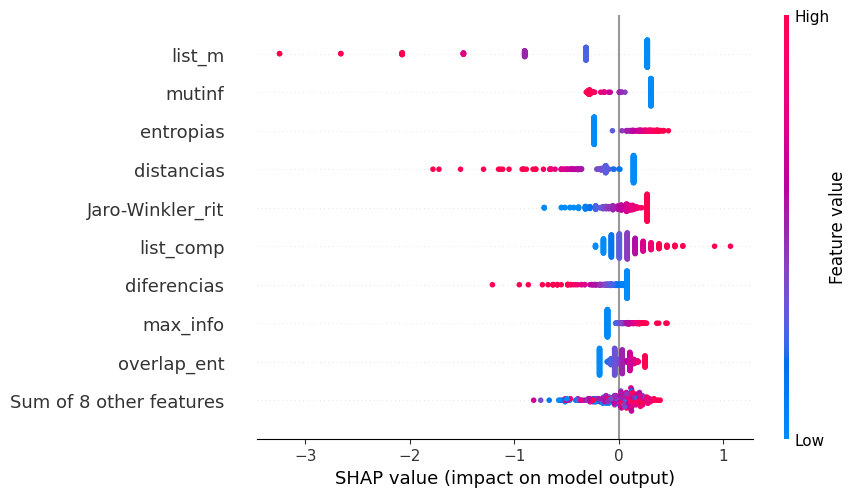

In [64]:
shap.plots.beeswarm(shap_values)

In [65]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

[0.         0.         0.50907716 0.         0.         0.
 0.         0.31578947 0.         0.         0.24       0.
 0.55244755 1.         0.         0.         0.33333333] 1 1


IndexError: index 17 is out of bounds for axis 0 with size 17

In [94]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.         0.         0.73026745 0.         0.         0.
 0.         1.         0.38888889 0.         0.24137931 0.
 0.30275229 0.33333333 0.         0.66666667 0.95       0.
 1.        ]


IndexError: index 1 is out of bounds for axis 2 with size 1

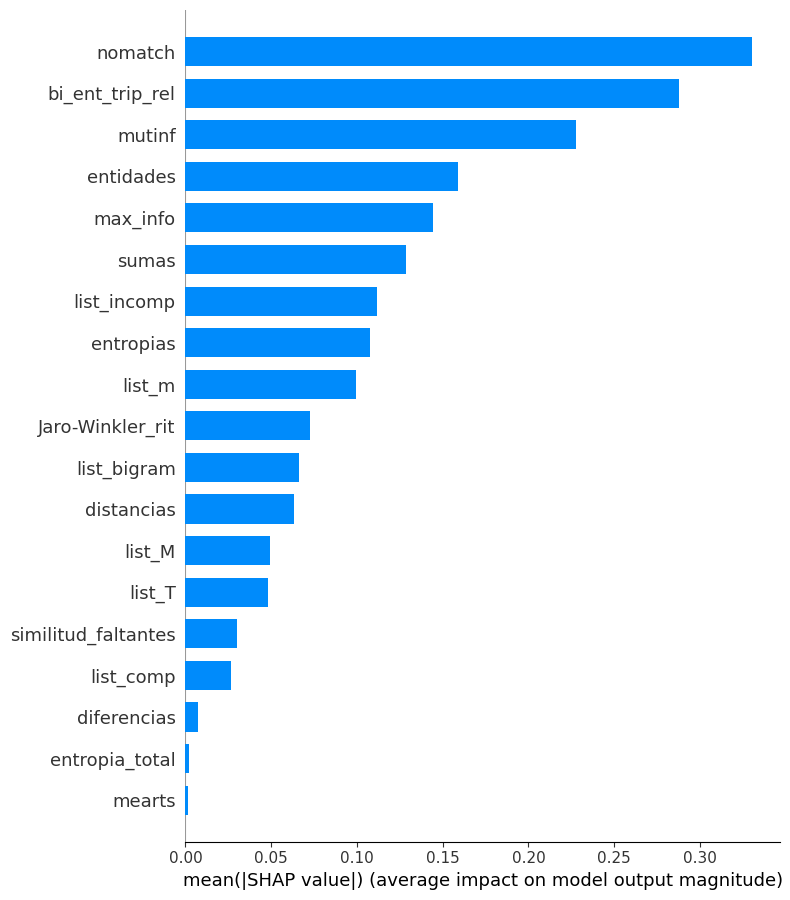

In [95]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

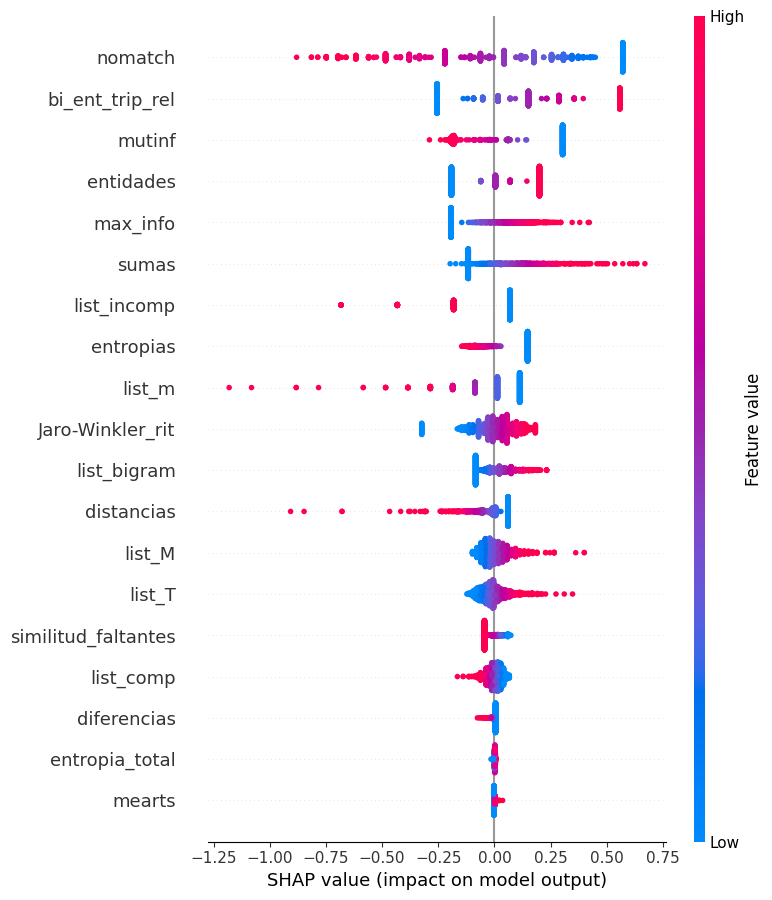

In [96]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

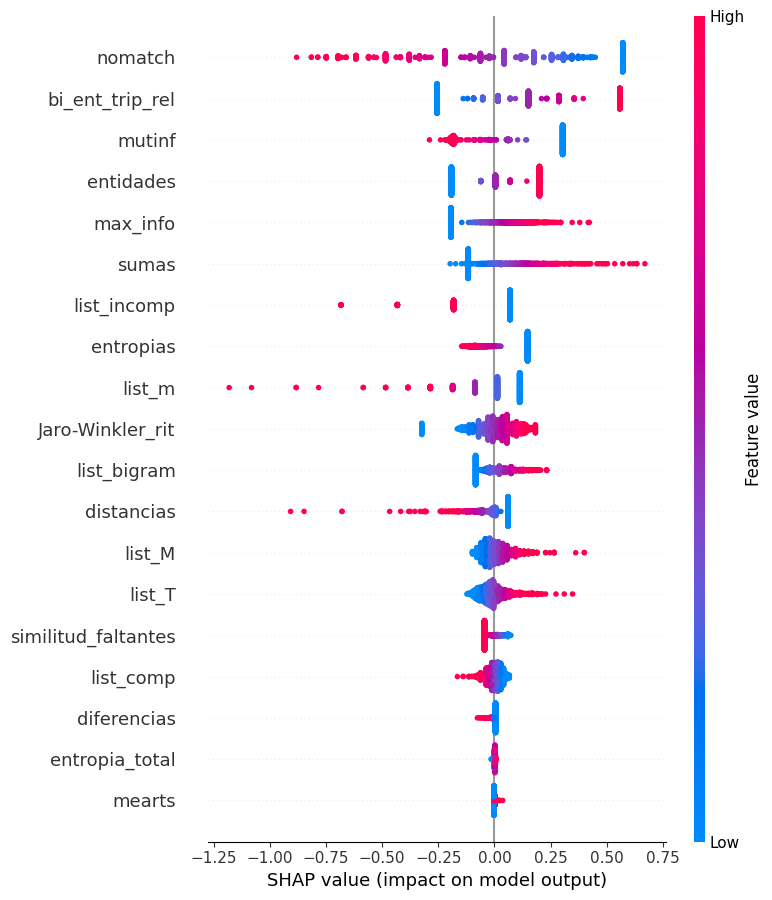

In [97]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

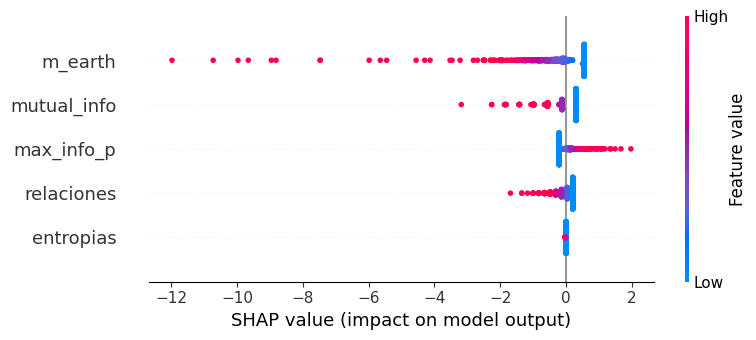

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.58
precision:  0.63
recall 0.42
f1_score:  0.51
matthews_score:  0.17


In [ ]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [ ]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.550000 (0.081558)
DecisionTree: 0.670000 (0.067294)
DecisionTree: 0.580000 (0.060962)


In [ ]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[287, 103],
       [236, 174]])

Profundidad del árbol: 23
Número de nodos terminales: 152


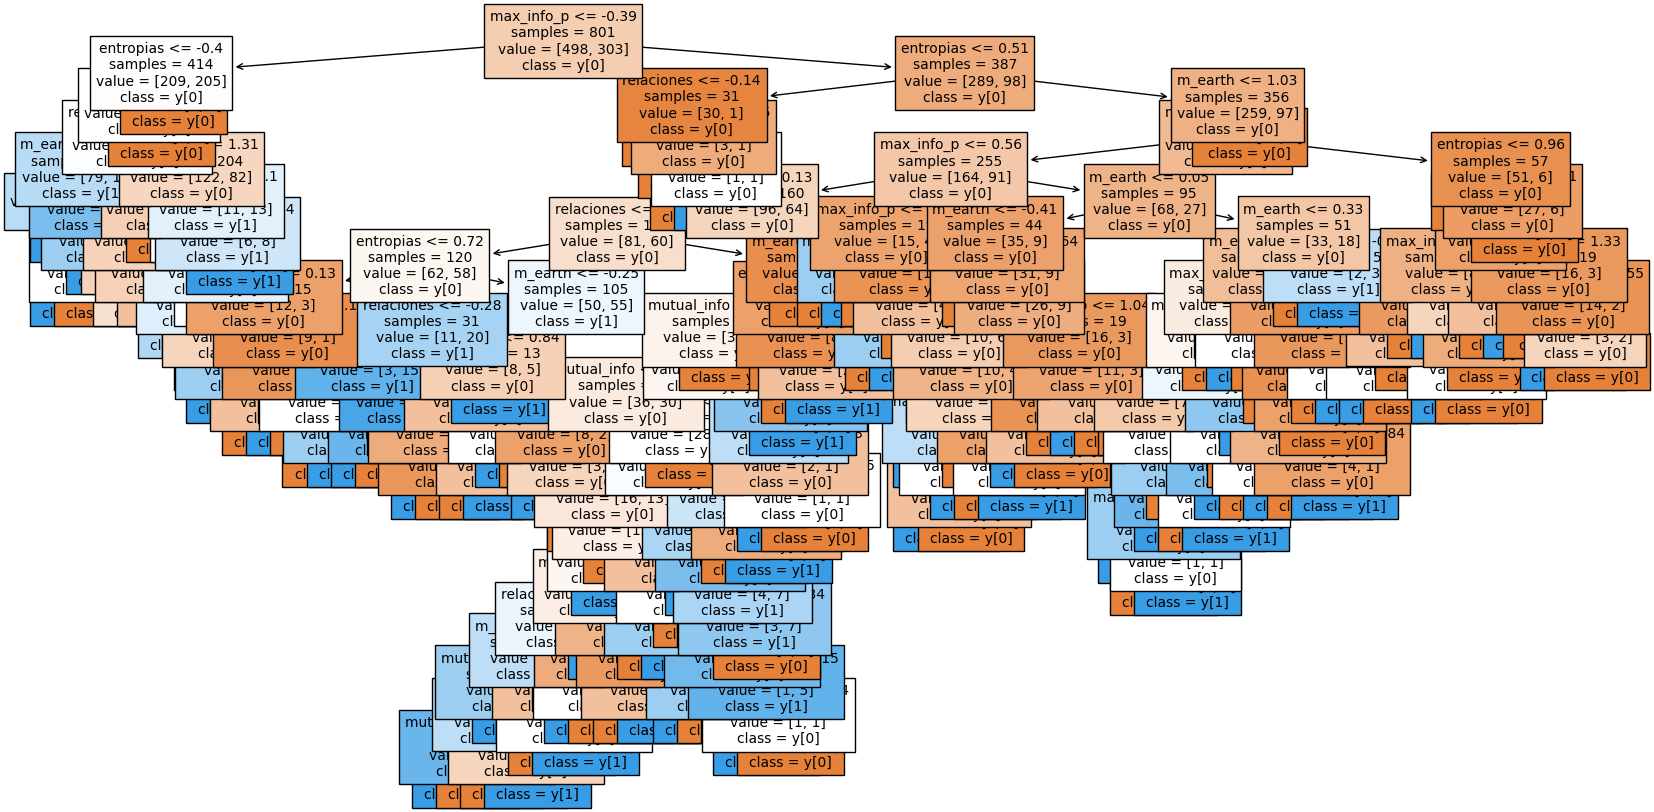

In [ ]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )